In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
cleaned_data = pd.read_csv('/Users/judytruong/Desktop/datahack/DinoData/dino_data_cleaned.csv', index_col=0)
cleaned_data

,name,diet,period,lived in,type,length,species,link,start year (mil. years ago),end year (mil. years ago),existance span (mil. years)
0,aardonyx,herbivorous,Early Jurassic,South Africa,sauropod,8.0,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,199,189,10
1,abelisaurus,carnivorous,Late Cretaceous,Argentina,large theropod,9.0,comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,74,70,4
2,achelousaurus,herbivorous,Late Cretaceous,USA,ceratopsian,6.0,horneri,https://www.nhm.ac.uk/discover/dino-directory/...,83,70,13
3,achillobator,carnivorous,Late Cretaceous,Mongolia,large theropod,5.0,giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,99,84,15
4,acrocanthosaurus,carnivorous,Early Cretaceous,USA,large theropod,12.0,atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,115,105,10
...,...,...,...,...,...,...,...,...,...,...,...
285,yinlong,herbivorous,Mid Jurassic,China,ceratopsian,1.2,downsi,https://www.nhm.ac.uk/discover/dino-directory/...,159,154,5
286,yuanmousaurus,herbivorous,Mid Jurassic,China,sauropod,17.0,jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,180,159,21
287,yunnanosaurus,omnivorous,Early Jurassic,China,sauropod,7.0,huangi,https://www.nhm.ac.uk/discover/dino-directory/...,205,190,15
288,zalmoxes,herbivorous,Late Cretaceous,Romania,euornithopod,3.0,robustus,https://www.nhm.ac.uk/discover/dino-directory/...,69,0,69


In [34]:
# Calculate the average existence span for each diet type
average_existence_span = cleaned_data.groupby('diet')['existance span (mil. years)'].mean().reset_index()

# Sort the values for better visualization
average_existence_span_sorted = average_existence_span.sort_values(by='existance span (mil. years)', ascending=False)

average_existence_span_sorted

,diet,existance span (mil. years)
0,carnivorous,26.423913
1,herbivorous,19.776471
4,unknown,13.000000
2,herbivorous/omnivorous,11.000000
3,omnivorous,7.500000


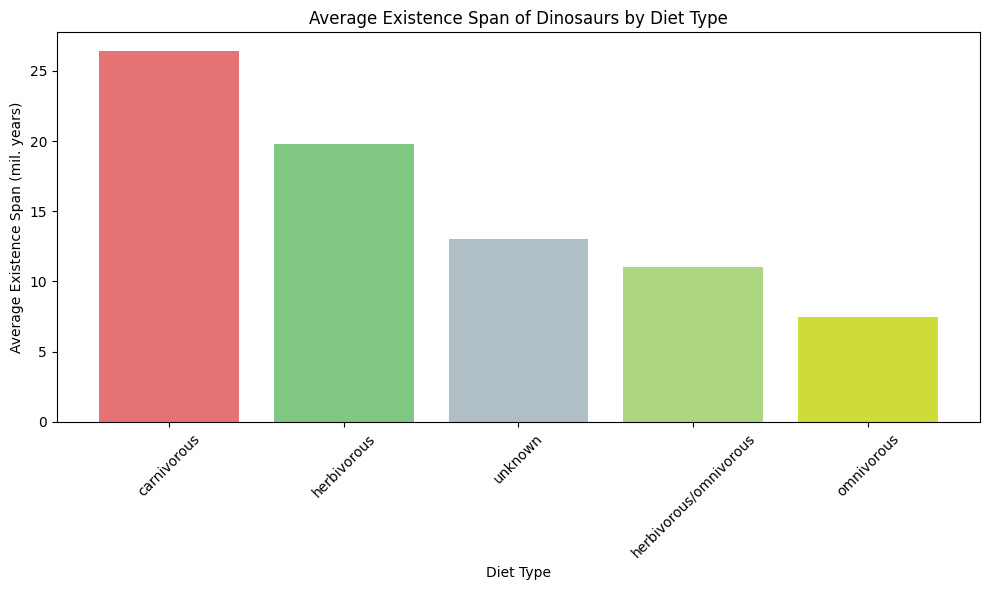

In [35]:
# Plotting the average existence span of different diet types
plt.figure(figsize=(10, 6))
plt.bar(average_existence_span_sorted['diet'], average_existence_span_sorted['existance span (mil. years)'],
        color=['#E57373', '#81C784', '#B0BEC5', '#AED581', '#CDDC39'])
plt.xlabel('Diet Type')
plt.ylabel('Average Existence Span (mil. years)')
plt.title('Average Existence Span of Dinosaurs by Diet Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Calculate the average length for each diet type
average_length = cleaned_data.groupby('diet')['length'].mean().reset_index()

# Sort the values for better visualization
average_length_sorted = average_length.sort_values(by='length', ascending=False)

average_length_sorted

,diet,length
1,herbivorous,8.898824
0,carnivorous,5.193696
2,herbivorous/omnivorous,5.150000
3,omnivorous,3.676923
4,unknown,1.000000


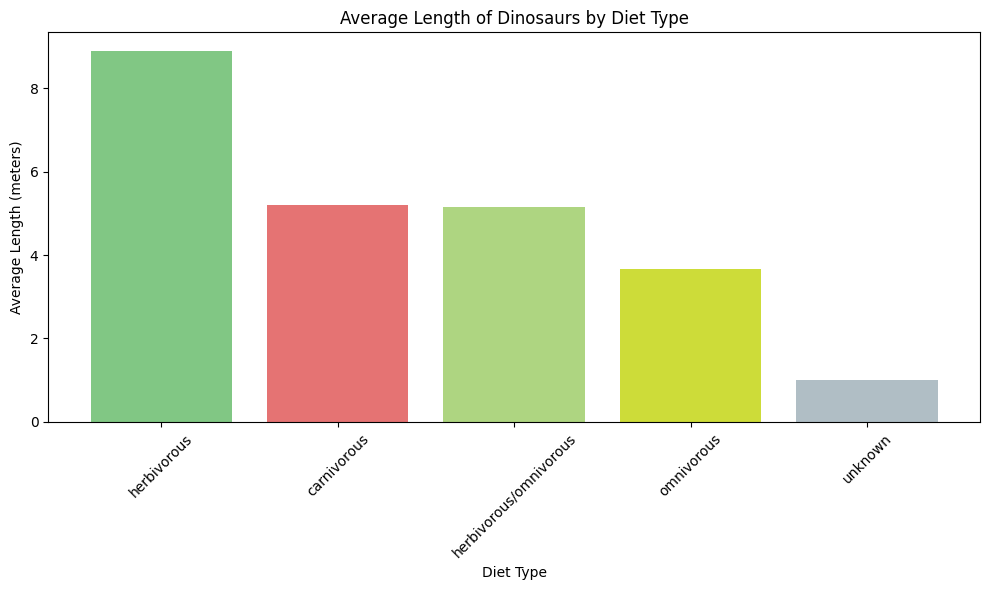

In [37]:
# Plotting the average length of different diet types
plt.figure(figsize=(10, 6))
plt.bar(average_length_sorted['diet'], average_length_sorted['length'],
        color=['#81C784', '#E57373', '#AED581', '#CDDC39', '#B0BEC5'])
plt.xlabel('Diet Type')
plt.ylabel('Average Length (meters)')
plt.title('Average Length of Dinosaurs by Diet Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From these graphs, there seems to be some sort of relationship between diet type and lifespan/size however from these graphs. 
We can see that the data is more skewed resulting in a average that might not be representative of the data.

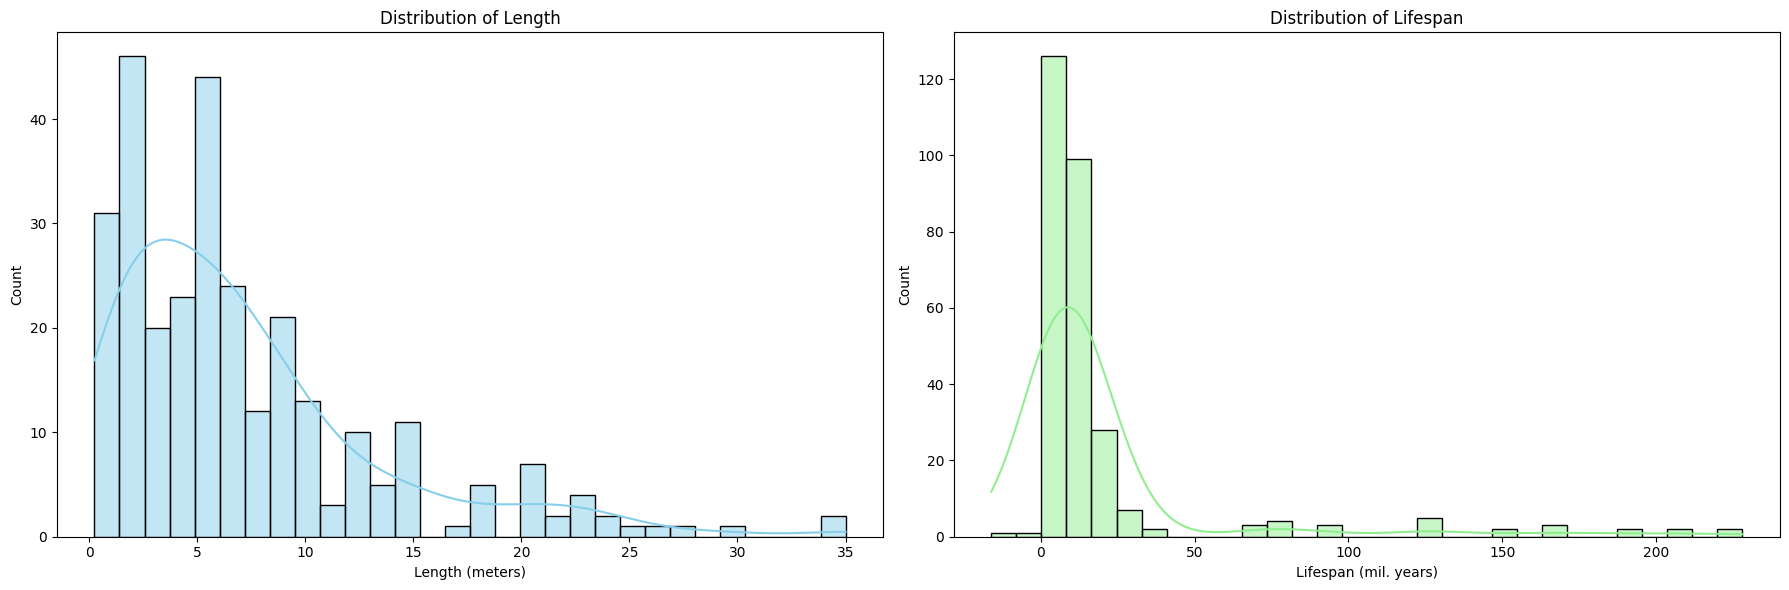

In [38]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot distribution of length
sns.histplot(cleaned_data['length'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Length')
axes[0].set_xlabel('Length (meters)')
axes[0].set_ylabel('Count')

# Plot distribution of lifespan
sns.histplot(cleaned_data['existance span (mil. years)'], kde=True, bins=30, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Lifespan')
axes[1].set_xlabel('Lifespan (mil. years)')
axes[1].set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
diet_type_counts = cleaned_data['diet'].value_counts()
diet_type_counts

diet
herbivorous               170
carnivorous                92
omnivorous                 26
unknown                     1
herbivorous/omnivorous      1
Name: count, dtype: int64

As shown, the data has more data on herbivores and less data on others which could lead to the data on dinosaurs with a different diet type to be misrepresented. Our data analysis for herbivores may be accurate, however due to the lack of data on the other diet types, our hypothesises may be inaccurate.

Now: I don't really know how to test or check whether these results/claims are accurate, but if I recall there was something about p-values?